In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\pawar\AppData\Local\Temp\ipykernel_11504\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
df = pd.read_csv('dummy_data.csv')

In [9]:
df.head(0)

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car


In [10]:
df['location'].value_counts()

location
Australia         352
United Kingdom    329
United States     319
Name: count, dtype: int64

In [11]:
df['platform'].value_counts()

platform
Instagram    363
YouTube      330
Facebook     307
Name: count, dtype: int64

<Axes: xlabel='time_spent', ylabel='gender'>

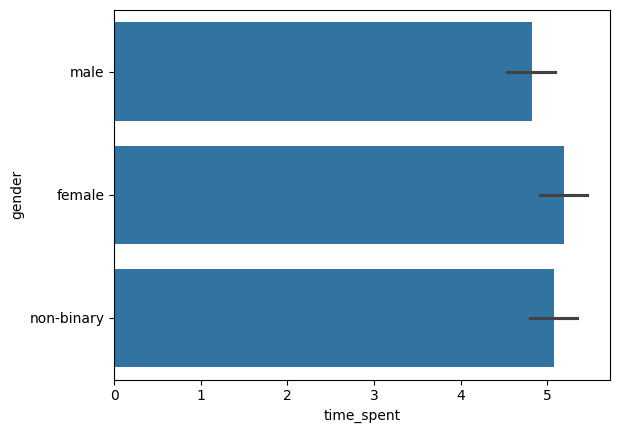

In [12]:
sns.barplot(data = df, x = 'time_spent' , y = 'gender')

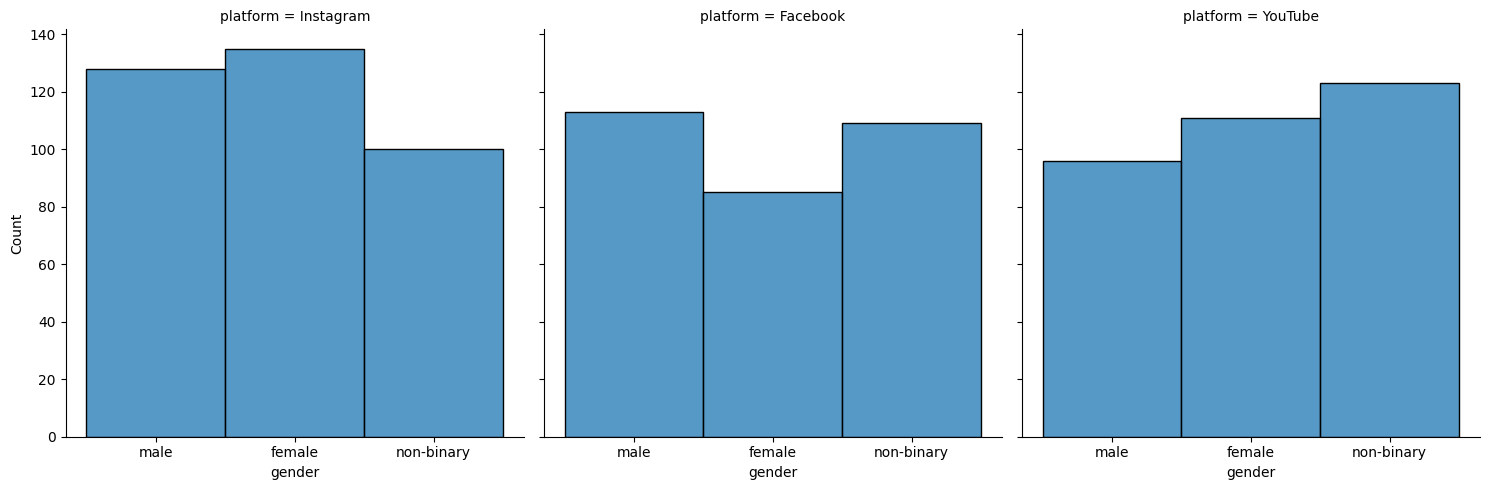

In [13]:
sns.displot(df, x="gender", col="platform")

In [14]:
def life_stage(age):
    if age >0 and age <12:
        return "child"
    elif age>=12 and age<=18:
        return "teenage"
    elif age>18 and age<40:
        return "young"
    elif age>=40 and age<=60:
        return "middle_age"
    else:
        return "old"

In [15]:
def Screen_time(number):
    if number<=2:
        return "Normal"
    elif number>2 and number<=4:
        return "Moderate"
    elif number>4 and number<=6:
        return "High"
    elif number>6:
        return "Extreme"

In [16]:
df["life_stage"]=df["age"].apply(life_stage)
df["Screen_time"]=df["time_spent"].apply(Screen_time)

<Axes: xlabel='life_stage', ylabel='count'>

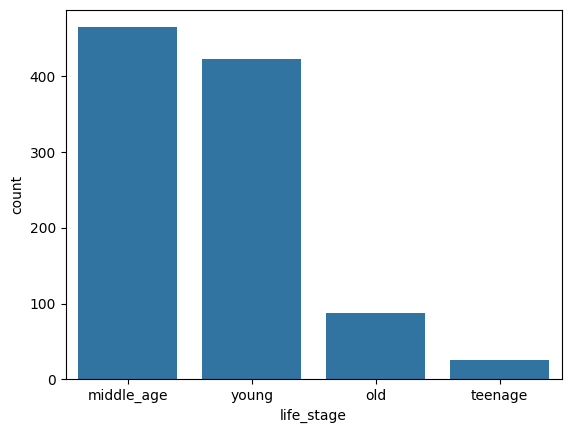

In [17]:
sns.countplot(x=df["life_stage"])

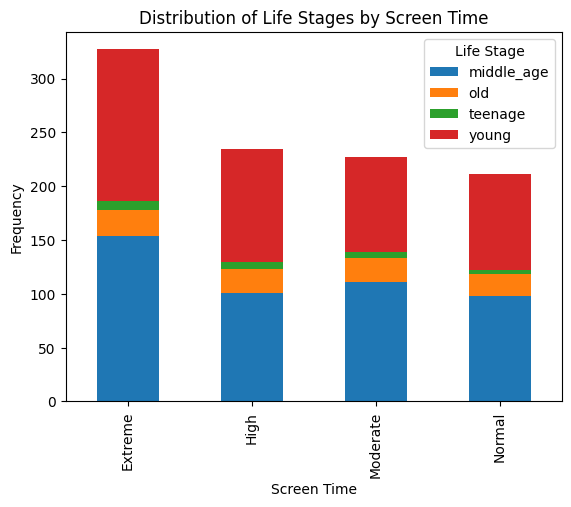

In [18]:
df.groupby(['Screen_time', 'life_stage']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Screen Time')
plt.ylabel('Frequency')
plt.title('Distribution of Life Stages by Screen Time')
plt.legend(title='Life Stage')
plt.show()

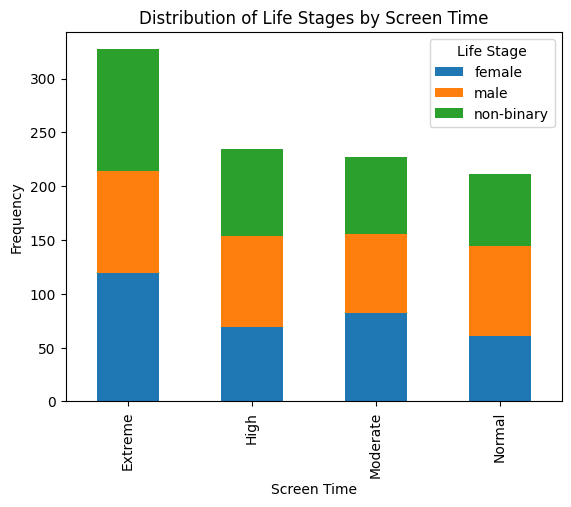

In [19]:
df.groupby(['Screen_time', 'gender']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Screen Time')
plt.ylabel('Frequency')
plt.title('Distribution of Life Stages by Screen Time')
plt.legend(title='Life Stage')
plt.show()

In [20]:
df.head(0)

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,life_stage,Screen_time


time_spent / platform

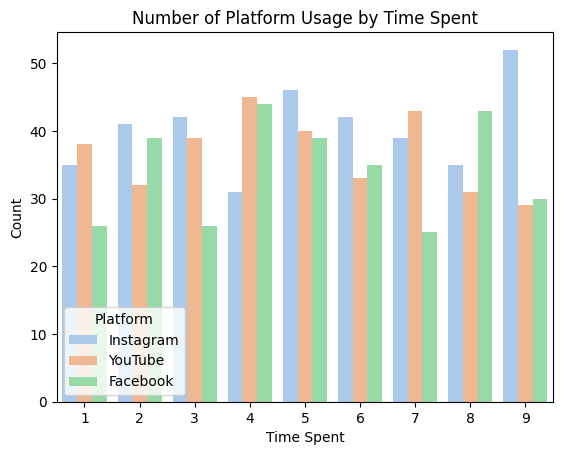

In [21]:
df['count'] = df.groupby(['platform','time_spent']).platform.transform('size')

sns.barplot(data=df, x='time_spent', y='count', hue='platform',palette='pastel')
plt.xlabel('Time Spent')
plt.ylabel('Count')
plt.title('Number of Platform Usage by Time Spent')
plt.legend(title='Platform')
plt.show()

In [23]:
df['count']

0      42
1      39
2      35
3      46
4      35
       ..
995    35
996    33
997    40
998    45
999    31
Name: count, Length: 1000, dtype: int64

platform / life_stage

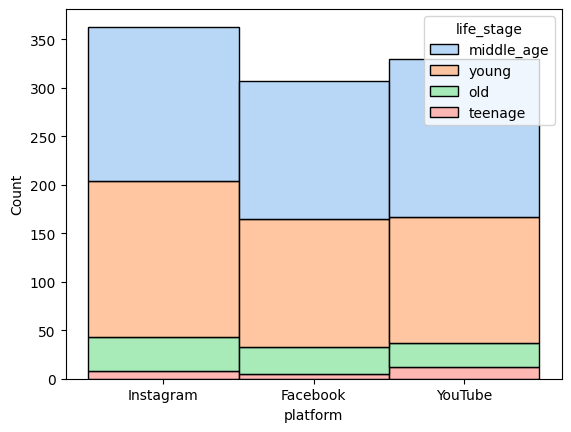

In [25]:
sns.histplot(data=df, x='platform', hue='life_stage', multiple='stack',palette='pastel')
plt.show()

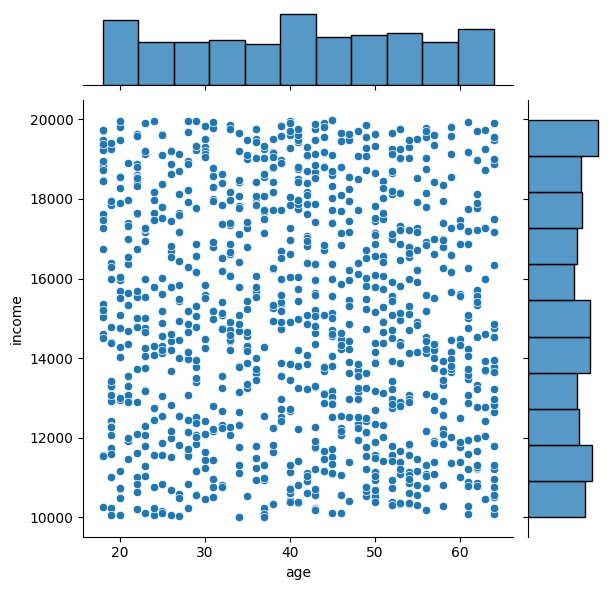

In [28]:
sns.jointplot(data=df, x="age", y="income")